In [33]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from azure.storage.blob import BlobServiceClient, ContainerClient
from azure.identity import DefaultAzureCredential
# from mpl_toolkits.mplots3d import Axes3D

In [30]:
def_creds = DefaultAzureCredential()

service = BlobServiceClient(
    account_url="https://<custsegstore>.blob.core.windows.net/", 
    credential=def_creds,
    )

In [31]:
container_client = service.get_container_client("container1")

In [32]:
blobs_list = container_client.list_blobs()
for blob in blobs_list:
    print(blob.name)

ClientAuthenticationError: Server failed to authenticate the request. Please refer to the information in the www-authenticate header.
RequestId:aeed9e9d-c01e-0046-2cc0-d1fc18000000
Time:2024-07-09T05:27:32.3825458Z
ErrorCode:NoAuthenticationInformation
Content: <?xml version="1.0" encoding="utf-8"?><Error><Code>NoAuthenticationInformation</Code><Message>Server failed to authenticate the request. Please refer to the information in the www-authenticate header.
RequestId:aeed9e9d-c01e-0046-2cc0-d1fc18000000
Time:2024-07-09T05:27:32.3825458Z</Message></Error>

In [16]:
scaled_features = pd.read_parquet("../data/processed/data_processed.parquet")
scaled_features

,recency,frequency,monetary_value
1,6,31,711.79
32,15,17,892.80
49,355,73,1757.55
122,63,17,334.40
139,77,15,296.50
...,...,...,...
100700,96,10,180.60
100710,193,7,80.82
100717,247,7,100.21
100724,36,57,108.45


In [17]:
SSE = []

for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, init="k-means++")
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)

# convert results into df
df = pd.DataFrame({
    'Cluster':range(1,10),
    'SSE':SSE
})

Text(0, 0.5, 'Inertia')

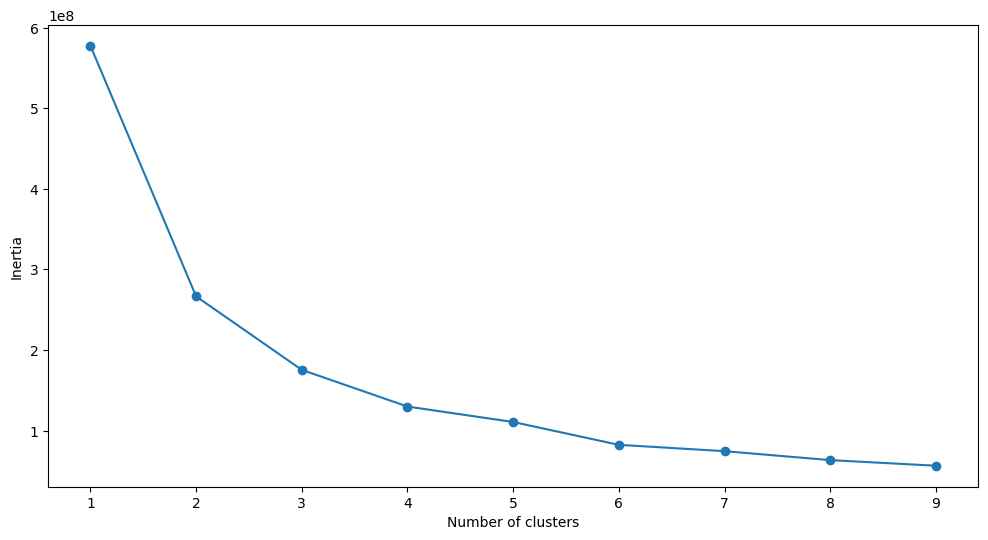

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Cluster'], df['SSE'], marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

Elbow method suggested 3 clusters is optimal.

In [19]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(scaled_features)

KMeans(n_clusters=3)

### Performance

The higher silhouette score, the better model.

In [20]:
silhouette_score(scaled_features, kmeans.labels_, metric='euclidean')

0.4851889804009213

In [21]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(scaled_features)
frame['cluster'] = pred

In [22]:
frame

,recency,frequency,monetary_value,cluster
1,6,31,711.79,1
32,15,17,892.80,1
49,355,73,1757.55,0
122,63,17,334.40,2
139,77,15,296.50,2
...,...,...,...,...
100700,96,10,180.60,2
100710,193,7,80.82,2
100717,247,7,100.21,2
100724,36,57,108.45,2


Identify distinct traits of customers

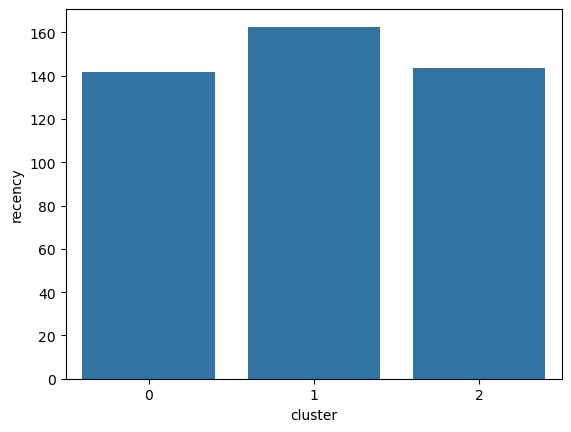

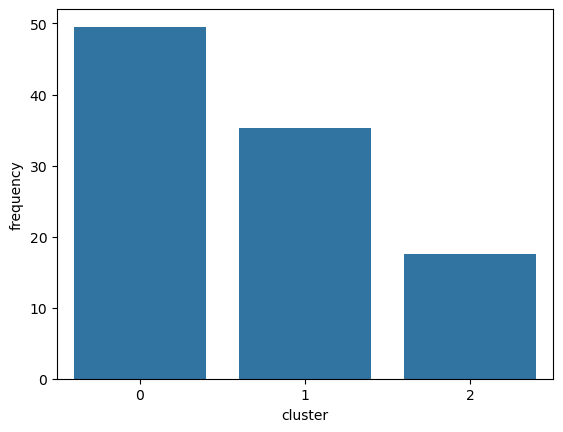

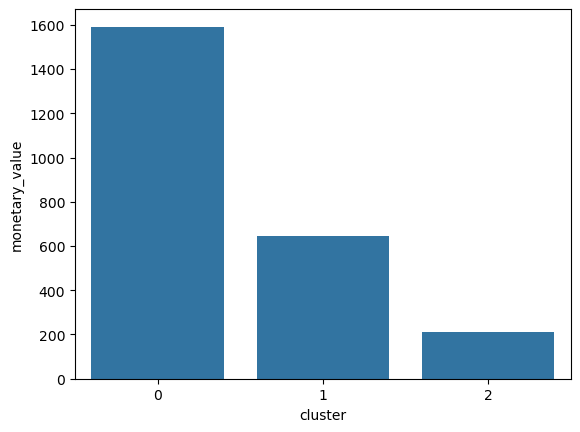

In [23]:
import seaborn as sns
avg_df = frame.groupby(['cluster'], as_index=False).mean()

ls = ['recency', 'frequency', 'monetary_value']
for i in ls:
    sns.barplot(x="cluster", y=str(i), data=avg_df)
    plt.show()

Hierarchical Clustering